In [1]:
import numpy as np
import sympy as sp

# Define material properties
Em = 10000
ν = 0.25
th = 3
aspect = 6/5
Nsub = 4

# Create the material matrix Emat
Emat = Em / (1 - ν**2) * np.array([[1, ν, 0], [ν, 1, 0], [0, 0, (1 - ν) / 2]])

# Define FEM model
NodeCoordinates = np.array([[0, 6], [0, 0], [5, 6], [5, 0]])

# Define element nodes
ElemNodes = np.array([[1, 2, 4, 3]])

numnod = len(NodeCoordinates)
numele = len(ElemNodes)

# Define element types
ElemTypes = ['Quad4'] * numele

# Define element materials and fabrications
ElemMaterials = [Emat] * numele
ElemFabrications = [th] * numele

# Define nodal degrees of freedom (DOF) values and tags
NodeDOFValues = np.zeros((numnod, 2))
NodeDOFTags = np.zeros((numnod, 2), dtype=int)

NodeDOFValues[0] = NodeDOFValues[2] = [0, 75]  # Nodal loads
NodeDOFTags[0] = [1, 0]  # Vertical roller at node 1
NodeDOFTags[1] = [1, 1]  # Fixed node 2
NodeDOFTags[3] = [0, 1]  # Horizontal roller at node 4

# Process options (if needed)
ProcessOptions = True

# You can perform further analysis and visualization using SymPy and NumPy as needed.

# To print information, you can use the print function.
print("Node Coordinates:")
print(NodeCoordinates)

print("Element Nodes:")
print(ElemNodes)

# You can also use matplotlib or other plotting libraries for visualization.

# Note that the visualization functions used in your original code may not directly translate to Python, so you may need to adapt or create new visualization functions as needed.


Node Coordinates:
[[0 6]
 [0 0]
 [5 6]
 [5 0]]
Element Nodes:
[[1 2 4 3]]


In [2]:
import numpy as np
import sympy as sp

# Define material properties
Em = 10000
ν = 0.25
th = 3
aspect = 6/5
Nsub = 4

# Create the material matrix Emat
Emat = Em / (1 - ν**2) * np.array([[1, ν, 0], [ν, 1, 0], [0, 0, (1 - ν) / 2]])

# Define FEM model
NodeCoordinates = np.array([[0, 6], [0, 3], [0, 0], [5/2, 6], [5/2, 3], [5/2, 0], [5, 6], [5, 3], [5, 0]])

# Define element nodes
ElemNodes = np.array([[1, 3, 9, 7, 2, 6, 8, 4, 5]])

numnod = len(NodeCoordinates)
numele = len(ElemNodes)

# Define element types
ElemTypes = ['Quad9'] * numele

# Define element materials and fabrications
ElemMaterials = [Emat] * numele
ElemFabrications = [th] * numele

# Define nodal degrees of freedom (DOF) values and tags
NodeDOFValues = np.zeros((numnod, 2))
NodeDOFTags = np.zeros((numnod, 2), dtype=int)

NodeDOFValues[0] = NodeDOFValues[6] = [0, 25]
NodeDOFValues[3] = [0, 100]  # Nodal loads
NodeDOFTags[0] = NodeDOFTags[1] = [1, 0]  # Vertical roller at nodes 1 and 2
NodeDOFTags[2] = [1, 1]  # Fixed node 3
NodeDOFTags[5] = NodeDOFTags[8] = [0, 1]  # Horizontal roller at nodes 6 and 9

# Process options (if needed)
ProcessOptions = True

# You can perform further analysis and visualization using SymPy and NumPy as needed.

# To print information, you can use the print function.
print("Node Coordinates:")
print(NodeCoordinates)

print("Element Nodes:")
print(ElemNodes)

# You can also use matplotlib or other plotting libraries for visualization.

# Note that the visualization functions used in your original code may not directly translate to Python, so you may need to adapt or create new visualization functions as needed.


Node Coordinates:
[[0.  6. ]
 [0.  3. ]
 [0.  0. ]
 [2.5 6. ]
 [2.5 3. ]
 [2.5 0. ]
 [5.  6. ]
 [5.  3. ]
 [5.  0. ]]
Element Nodes:
[[1 3 9 7 2 6 8 4 5]]


In [3]:
import numpy as np
import sympy as sp

def PlaneStressSolution(nodxyz, eletyp, elenod, elemat, elefab, nodtag, nodval, prcopt):
    numer = True

    if len(prcopt) >= 1:
        numer = prcopt[0]

    K = PlaneStressMasterStiffness(nodxyz, eletyp, elenod, elemat, elefab, prcopt)

    if K is None:
        return [None] * 6

    Kmod = ModifiedMasterStiffness(nodtag, K)
    f = FlatNodePartVector(nodval)
    fmod = ModifiedNodeForces(nodtag, nodval, K, f)
    u = np.linalg.solve(Kmod, fmod)

    if numer:
        u = np.around(u, decimals=15)

    f = np.dot(K, u)

    if numer:
        f = np.around(f, decimals=15)

    nodfor = NodePartFlatVector(2, f)
    noddis = NodePartFlatVector(2, u)

    nodpnc, nodsig = PlaneStressPlateStresses(nodxyz, eletyp, elenod, elemat, elefab, noddis, prcopt)
    barele, barfor = PlaneStressBarForces(nodxyz, eletyp, elenod, elemat, elefab, noddis, prcopt)

    return [noddis, nodfor, nodpnc, nodsig, barele, barfor]

# You'll need to implement the missing functions (e.g., PlaneStressMasterStiffness, ModifiedMasterStiffness, FlatNodePartVector, etc.) based on your specific requirements and the corresponding Mathematica code.


In [4]:
import numpy as np
import sympy as sp

def PlaneStressMasterStiffness(nodxyz, eletyp, elenod, elemat, elefab, prcopt):
    numele = len(elenod)
    numnod = len(nodxyz)
    ncoor = None
    type = None
    enl = None
    neldof = None
    OKtyp = ["Bar2", "Bar3", "Quad4", "Quad4.1", "Quad8", "Quad8.2", "Quad9", "Quad9.2", "Trig3", "Trig6", "Trig6.-3", "Trig10", "Trig10.6"]
    OKenl = [2, 3, 4, 4, 8, 8, 9, 9, 3, 6, 6, 10, 10]

    K = np.zeros((2 * numnod, 2 * numnod))
    numer = prcopt[0] if len(prcopt) >= 1 else True

    for e in range(1, numele + 1):
        type = eletyp[e - 1]

        if type not in OKtyp:
            print(f"Illegal type: {type} element e = {e}. Assembly aborted")
            return None

        enl = elenod[e - 1]
        n = len(enl)
        j = OKtyp.index(type)

        if OKenl[j] != n:
            print(f"Wrong node list length, element = {e}. Assembly aborted")
            return None

        eft = [2 * enl[i] - 1 for i in range(n)] + [2 * enl[i] for i in range(n)]
        ncoor = [nodxyz[enl[i] - 1] for i in range(n)]

        if type == "Bar2":
            Em = elemat[e - 1]
            A = elefab[e - 1]
            Ke = PlaneBar2Stiffness(ncoor, Em, A, [numer])
        # Add similar conditionals for other element types

        neldof = len(Ke)

        for i in range(neldof):
            ii = eft[i]

            for j in range(i, neldof):
                jj = eft[j]
                K[jj, ii] += Ke[i, j]
                if i != j:
                    K[ii, jj] += Ke[i, j]

    return K

# Implement the functions PlaneBar2Stiffness and similar functions for other element types as needed.


In [5]:
import numpy as np
import sympy as sp

def PlaneStressPlateStresses(nodxyz, eletyp, elenod, elemat, elefab, noddis, prcopt):
    numele = len(elenod)
    numnod = len(nodxyz)
    ncoor = None
    type = None
    enl = None
    k = None
    n = None
    Emat = None
    th = None
    numer = prcopt[0] if len(prcopt) >= 1 else True
    nodpnc = np.zeros(numnod)
    nodsig = np.zeros((numnod, 3))

    for e in range(1, numele + 1):
        type = eletyp[e - 1]
        enl = elenod[e - 1]
        k = len(enl)
        ncoor = [nodxyz[enl[i] - 1] for i in range(k)]
        ue = [[noddis[enl[i] - 1, 0], noddis[enl[i] - 1, 1]] for i in range(k)]
        ue = [item for sublist in ue for item in sublist]  # Flatten ue

        if type[:3] == "Bar":
            continue

        if type == "Quad4":
            Emat = elemat[e - 1]
            th = elefab[e - 1]
            sige = Quad4IsoPMembraneStresses(ncoor, Emat, th, ue, [numer])
        # Add similar conditionals for other element types

        for i in range(k):
            n = enl[i]
            nodpnc[n - 1] += 1
            nodsig[n - 1] += sige[i]

    for n in range(numnod):
        k = nodpnc[n]
        if k > 1:
            nodsig[n] /= k

    if numer:
        nodsig = np.around(nodsig, decimals=15)

    return [nodpnc, nodsig]

# Implement the functions Quad4IsoPMembraneStresses and similar functions for other element types as needed.


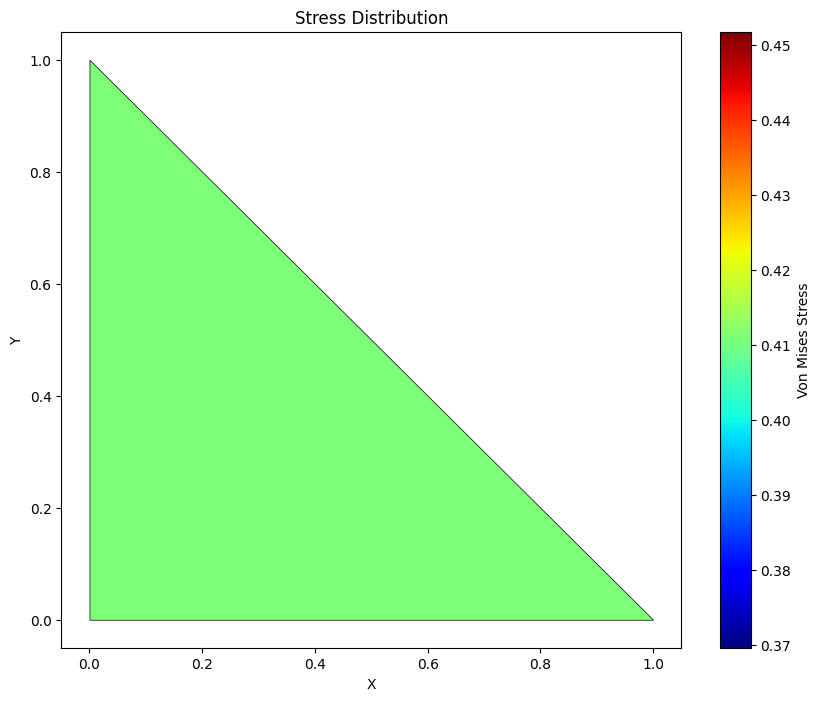

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

# Sample mesh coordinates (modify as needed)
mesh_coordinates = np.array([[0, 0], [1, 0], [0, 1]])

# Sample element connectivity (modify as needed)
element_connectivity = np.array([[0, 1, 2]])

# Sample Von Mises stress values (modify as needed)
von_mises_stress = np.random.rand(3)  # Replace with your actual stress data

# Create a Delaunay triangulation
triangulation = tri.Triangulation(mesh_coordinates[:, 0], mesh_coordinates[:, 1], triangles=element_connectivity)

# Create a plot with color-coded stress values
plt.figure(figsize=(10, 8))
plt.tripcolor(
    triangulation,
    von_mises_stress,  # Color-coded by Von Mises stress
    cmap=plt.cm.jet,
    edgecolors='k',  # Black element boundaries
    linewidth=0.5
)

plt.colorbar(label='Von Mises Stress')
plt.title('Stress Distribution')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()


In [9]:
import numpy as np
import sympy as sp

# Define material properties
Em = 10000
nu = 0.25
th = 3
aspect = 6 / 5
Nsub = 4

# Define material matrix
Emat = Em / (1 - nu**2) * np.array([[1, nu, 0], [nu, 1, 0], [0, 0, (1 - nu) / 2]])

# Define FEM model
s = np.array([1, 0.70, 0.48, 0.30, 0.16, 0.07, 0.0])
xy1 = np.array([0, 6])
xy7 = np.array([0, 1])
xy8 = np.array([2.5, 6])
xy14 = np.array([np.cos(3 * np.pi / 8), np.sin(3 * np.pi / 8)])
xy21 = np.array([np.cos(np.pi / 4), np.sin(np.pi / 4)])
xy15 = np.array([5, 6])
xy22 = np.array([5, 2])
xy28 = np.array([np.cos(np.pi / 8), np.sin(np.pi / 8)])
xy29 = np.array([5, 0])
xy35 = np.array([1, 0])

NodeCoordinates = np.zeros((35, 2))

for n in range(7):
    NodeCoordinates[n] = s[n] * xy1 + (1 - s[n]) * xy7

for n in range(7, 14):
    NodeCoordinates[n] = s[n - 7] * xy8 + (1 - s[n - 7]) * xy14

for n in range(14, 21):
    NodeCoordinates[n] = s[n - 14] * xy15 + (1 - s[n - 14]) * xy21

for n in range(21, 28):
    NodeCoordinates[n] = s[n - 21] * xy22 + (1 - s[n - 21]) * xy28

for n in range(28, 35):
    NodeCoordinates[n] = s[n - 28] * xy29 + (1 - s[n - 28]) * xy35

# Define element nodes
ElemNodes = np.zeros((24, 4), dtype=int)
ElemNodes[0] = [1, 2, 9, 8]

for e in range(1, 6):
    ElemNodes[e] = ElemNodes[e - 1] + [1, 1, 1, 1]

ElemNodes[6] = ElemNodes[5] + [2, 2, 2, 2]

for e in range(7, 12):
    ElemNodes[e] = ElemNodes[e - 1] + [1, 1, 1, 1]

ElemNodes[12] = ElemNodes[11] + [2, 2, 2, 2]

for e in range(13, 18):
    ElemNodes[e] = ElemNodes[e - 1] + [1, 1, 1, 1]

ElemNodes[18] = ElemNodes[17] + [2, 2, 2, 2]

for e in range(19, 24):
    ElemNodes[e] = ElemNodes[e - 1] + [1, 1, 1, 1]

numnod = len(NodeCoordinates)
numele = len(ElemNodes)

ElemTypes = ["Quad4"] * numele

# Define material and fabrications for elements
ElemMaterials = [Emat] * numele
ElemFabrications = [th] * numele

# Define nodal degrees of freedom
NodeDOFValues = np.zeros((numnod, 2))
NodeDOFTags = np.zeros((numnod, 2))

NodeDOFValues[0] = NodeDOFValues[14] = [0, 37.5]
NodeDOFValues[7] = [0, 75]

for n in range(7):
    NodeDOFTags[n] = [1, 0]  # Vertical roller at nodes 1-7

for n in range(28, 35):
    NodeDOFTags[n] = [0, 1]  # Horizontal roller at node 4

# Define process options
ProcessOptions = [True]

# Print node coordinates, element types, and freedom activity (skipped in Python)

# Solve problem
# You will need to implement the PlaneStressSolution function or use a library that provides it.
# The solution includes NodeDisplacements, NodeForces, NodePlateCounts, NodePlateStresses,
# ElemBarNumbers, and ElemBarForces.

# Print solution (skipped in Python)

# Plot displacement components (skipped in Python)

# Plot nodal stresses
# You will need to implement the ContourPlotNodeFuncOver2DMesh function or use a library that provides it.
# The code for plotting nodal stresses is similar to the one for displacement components.
